In [1]:
import torch
import numpy as np
import sys
import os

main_dir = r'D:\LARGE_CNN\ECG_ML\MAIN'
if main_dir not in sys.path:
    sys.path.append(main_dir)
from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
os.listdir()

['0_main.ipynb',
 'disease_SB_physio_im_0.txt',
 'disease_SB_physio_im_1.txt',
 'disease_SB_physio_im_2.txt',
 'disease_SB_physio_im_3.txt',
 'disease_SB_physio_im_4.txt',
 'disease_SB_physio_im_5.txt',
 'disease_SB_physio_im_6.txt',
 'disease_SB_physio_im_7.txt',
 'disease_SB_physio_im_8.txt',
 'disease_SB_physio_im_9.txt',
 'disease_SR_physio_im_0.txt',
 'disease_SR_physio_im_1.txt',
 'disease_SR_physio_im_2.txt',
 'disease_SR_physio_im_3.txt',
 'disease_SR_physio_im_4.txt',
 'disease_SR_physio_im_5.txt',
 'disease_SR_physio_im_6.txt',
 'disease_SR_physio_im_7.txt',
 'disease_SR_physio_im_8.txt',
 'disease_SR_physio_im_9.txt',
 'disease_ST_physio_im_0.txt',
 'disease_ST_physio_im_1.txt',
 'disease_ST_physio_im_2.txt',
 'disease_ST_physio_im_3.txt',
 'disease_ST_physio_im_4.txt',
 'disease_ST_physio_im_5.txt',
 'disease_ST_physio_im_6.txt',
 'disease_ST_physio_im_7.txt',
 'disease_ST_physio_im_8.txt',
 'disease_ST_physio_im_9.txt']

In [3]:
cc = np.loadtxt('disease_ST_physio_im_3.txt')
cc.shape


(500, 307200)

In [4]:

data_SB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_SB_physio_im_'+str(i)+'.txt')
    data_SB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data SB of length {len(cc)} in {i} index loaded")
print(data_SB_list[0].shape)
data_SB_list=np.reshape(data_SB_list,(5000,480,640))

data_ST_list=[]
for i in range(10):
    cc = np.loadtxt('disease_ST_physio_im_'+str(i)+'.txt')
    data_ST_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data ST of length {len(cc)} in {i} index loaded")
print(data_ST_list[0].shape)
data_ST_list=np.reshape(data_ST_list,(5000,480,640))

data_SR_list=[]
for i in range(10):
    cc = np.loadtxt('disease_SR_physio_im_'+str(i)+'.txt')
    data_SR_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data SR of length {len(cc)} in {i} index loaded")
data_SR_list=np.reshape(data_SR_list,(5000,480,640))
print(data_SR_list[0].shape)


(500, 307200)
data SB of length 500 in 0 index loaded
(500, 307200)
data SB of length 500 in 1 index loaded
(500, 307200)
data SB of length 500 in 2 index loaded
(500, 307200)
data SB of length 500 in 3 index loaded
(500, 307200)
data SB of length 500 in 4 index loaded
(500, 307200)
data SB of length 500 in 5 index loaded
(500, 307200)
data SB of length 500 in 6 index loaded
(500, 307200)
data SB of length 500 in 7 index loaded
(500, 307200)
data SB of length 500 in 8 index loaded
(500, 307200)
data SB of length 500 in 9 index loaded
(500, 307200)
(500, 307200)
data ST of length 500 in 0 index loaded
(500, 307200)
data ST of length 500 in 1 index loaded
(500, 307200)
data ST of length 500 in 2 index loaded
(500, 307200)
data ST of length 500 in 3 index loaded
(500, 307200)
data ST of length 500 in 4 index loaded
(500, 307200)
data ST of length 500 in 5 index loaded
(500, 307200)
data ST of length 500 in 6 index loaded
(500, 307200)
data ST of length 500 in 7 index loaded
(500, 307200)


In [6]:
data_SR_list=np.reshape(data_SR_list,(5000,480,640))


In [7]:
import numpy as np

# Create labels array
labels = np.concatenate((
    np.zeros(5000),
    np.ones(5000),
    np.ones(5000) * 2
))

# Concatenate image data
images = np.concatenate((data_SB_list, data_ST_list, data_SR_list))

# Reshape images array
images = images.reshape(15000, 1, 480, 640)

# Print lengths and shapes
print(len(images), len(labels))
print(images.shape)
print(labels.shape)

# Delete unnecessary variables
del data_SB_list, data_ST_list, data_SR_list

15000 15000
(15000, 1, 480, 640)
(15000,)


In [8]:
# Create an instance of your dataset
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
del images,labels
torch.manual_seed(52)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
del images_train, images_test, labels_train, labels_test
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### model

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 60 * 80, 512)
        self.fc2 = nn.Linear(512, 3)
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 240x320
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 120x160
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 60x80
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 128 * 60 * 80)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

In [10]:

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [12]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__ = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model__.parameters(), lr=0.001)  

num_epochs = 25
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/25], Train Loss: 0.8914, Test Loss: 0.6572, Train Accuracy: 58.8917, Test Accuracy: 75.4211
Epoch [2/25], Train Loss: 0.6465, Test Loss: 0.5428, Train Accuracy: 73.1417, Test Accuracy: 81.3608
Epoch [3/25], Train Loss: 0.5092, Test Loss: 0.3934, Train Accuracy: 80.7833, Test Accuracy: 89.3506
Epoch [4/25], Train Loss: 0.4010, Test Loss: 0.3198, Train Accuracy: 86.3083, Test Accuracy: 91.5669
Epoch [5/25], Train Loss: 0.3062, Test Loss: 0.2610, Train Accuracy: 90.0333, Test Accuracy: 92.3094
Epoch [6/25], Train Loss: 0.2422, Test Loss: 0.2072, Train Accuracy: 92.4333, Test Accuracy: 94.1268
Epoch [7/25], Train Loss: 0.2019, Test Loss: 0.1830, Train Accuracy: 93.7917, Test Accuracy: 94.7030
Epoch [8/25], Train Loss: 0.1711, Test Loss: 0.1689, Train Accuracy: 94.9583, Test Accuracy: 95.0687
Epoch [9/25], Train Loss: 0.1575, Test Loss: 0.1645, Train Accuracy: 95.2583, Test Accuracy: 95.5009
Epoch [10/25], Train Loss: 0.1412, Test Loss: 0.1617, Train Accuracy: 95.5250, Test Accurac

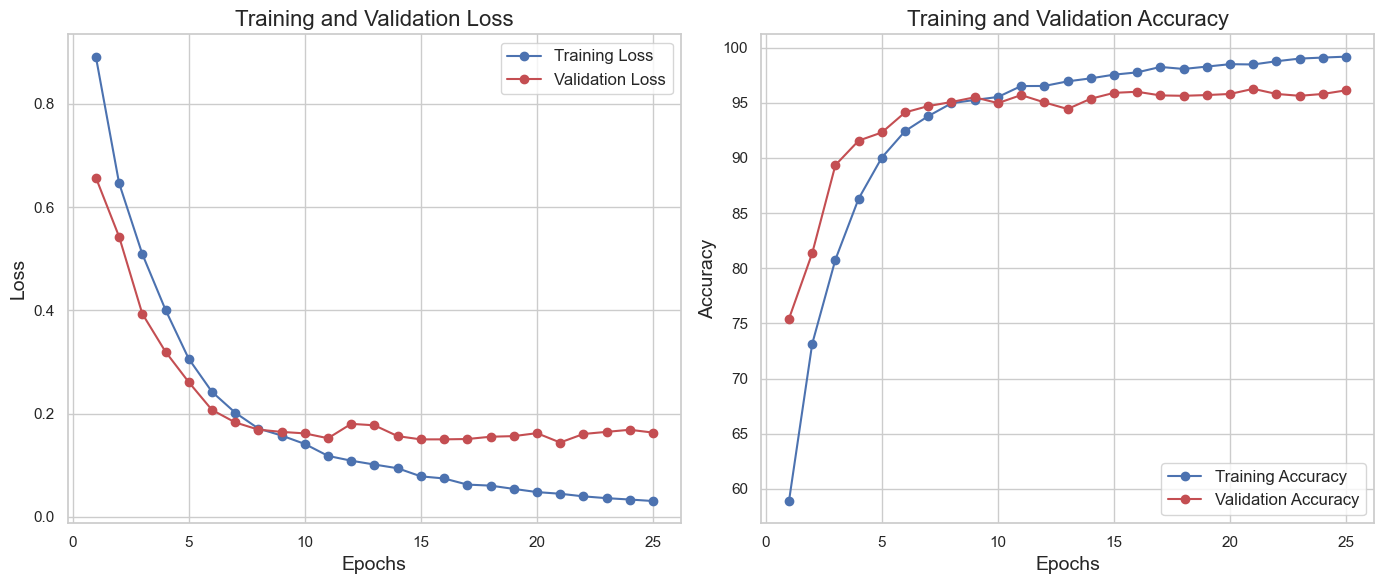

In [14]:
from plots import accuracy_and_validation_plots

#from plots import confusion_matrix_plot,classification_report_print,precision_recall_curve_plot
# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list)+1))

accuracy_and_validation_plots(epochs_, train_losses_list, test_losses_list, accuracy_train_list,accuracy_test_list).plot_figure("accuracy.png")


In [22]:
from plots import confusion_matrix_plot,classification_report_print,precision_recall_curve_plot,accuracy_and_validation_plots
from plots import ModelEvaluator


In [23]:
# accuracy_and_validation_plots(train_losses_list, test_losses_list, accuracy_train_list, accuracy_test_list)
y_true, y_pred=model_evaluate(model__, test_dataloader, device)
confusion_matrix_plot(y_true, y_pred,["ST", "SB", "SR"])
# confusion_matrix_plot(model__, test_dataloader,["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"])
# classification_report_print(model__, test_dataloader)
# precision_recall_curve_plot(model__, test_dataloader)


In [ ]:
classification_report_print(y_true, y_pred,["ST", "SB", "SR"])


In [16]:
os.getcwd()
torch.save(model__.state_dict(), 'model_imagestack.pth')

In [17]:
os.getcwd()


'd:\\LARGE_CNN\\ECG_ML\\MAIN\\zenodo_data\\data_stack_image'